In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Danh sách các cạnh (có cả cạnh có hướng và vô hướng)
edges = [
    # Undirected edges (add both directions)
    ('B', 'A', 2), ('A', 'B', 2),
    ('B', 'E', 2), ('E', 'B', 2),
    ('A', 'D', 4), ('D', 'A', 4),
    ('C', 'E', 2), ('E', 'C', 2),
    ('C', 'F', 1), ('F', 'C', 1),
    ('E', 'D', 3), ('D', 'E', 3),
    ('E', 'G', 1), ('G', 'E', 1),
    ('E', 'F', 3), ('F', 'E', 3),
    ('D', 'H', 1), ('H', 'D', 1),
    ('G', 'H', 4), ('H', 'G', 4),

    # Directed edges
    ('F', 'G', -1),
    ('G', 'D', -3),
    ('B', 'C', -2)
]

# Tập các đỉnh
nodes = set()
for u, v, _ in edges:
    nodes.add(u)
    nodes.add(v)



In [2]:
# Hàm Bellman-Ford
def bellman_ford(edges, source):
    dist = {node: float('inf') for node in nodes}
    dist[source] = 0
    predecessor = {node: None for node in nodes}

    for _ in range(len(nodes) - 1):
        for u, v, weight in edges:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                predecessor[v] = u

    # Kiểm tra chu trình âm
    for u, v, weight in edges:
        if dist[u] + weight < dist[v]:
            print("Đồ thị có chu trình âm!")
            return None, None

    return dist, predecessor

def draw_initial_graph(edges):
    G = nx.DiGraph()
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Đồ thị ban đầu")
    plt.show()
    plt.clf()
    plt.close()

def draw_shortest_path_tree(predecessor, distances, source):
    G = nx.DiGraph()
    for node in predecessor:
        if predecessor[node] is not None:
            u = predecessor[node]
            G.add_edge(u, node, weight=distances[node] - distances[u])

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=12, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Cây đường đi ngắn nhất từ đỉnh {source}")
    plt.show()
    plt.clf()
    plt.close()


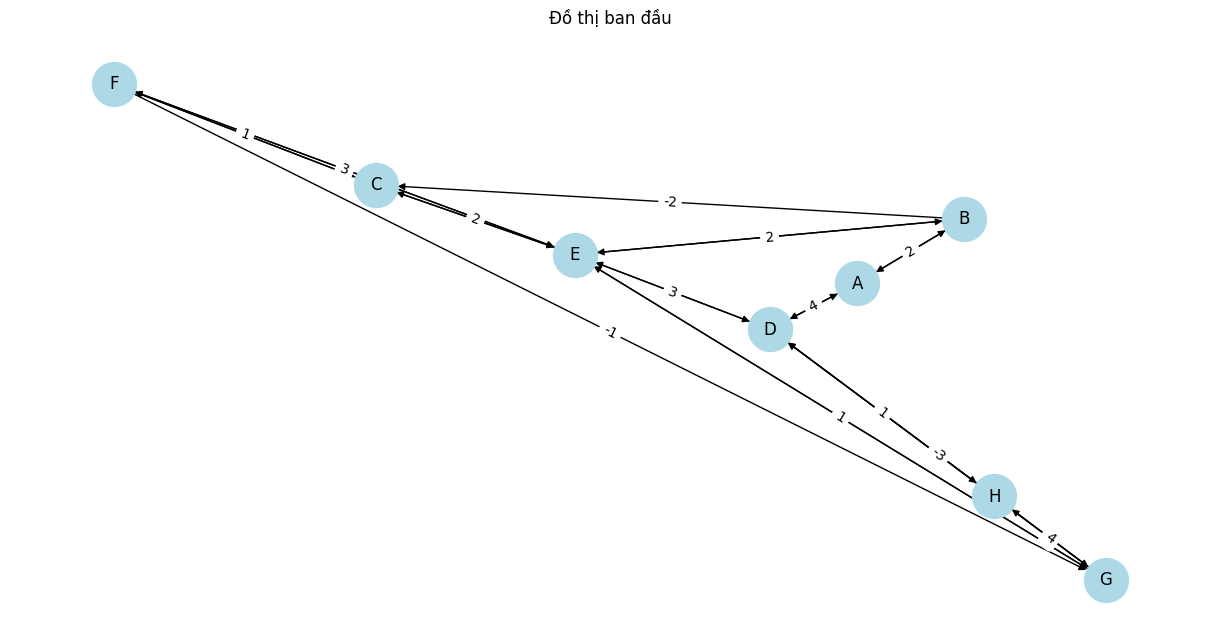

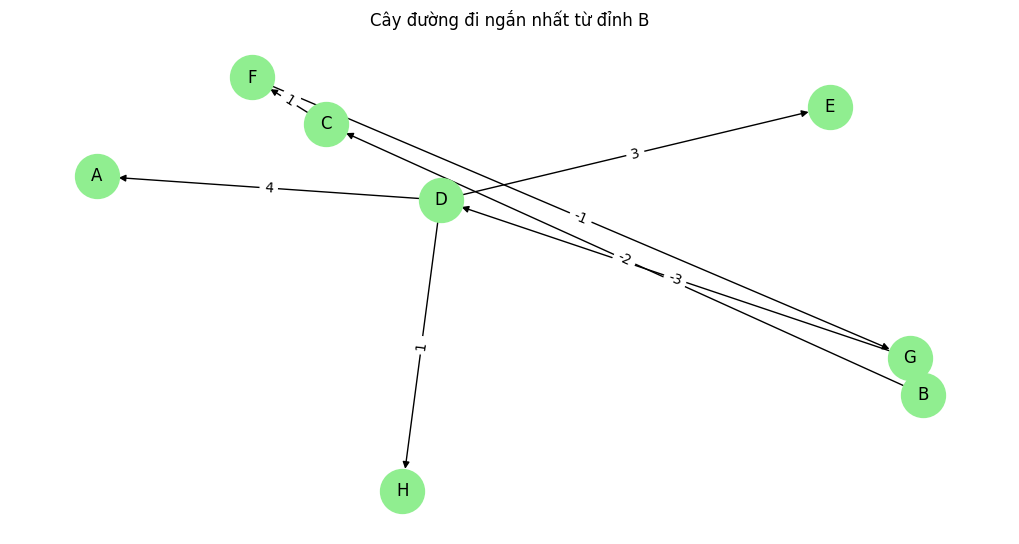

In [3]:
# Chạy
draw_initial_graph(edges)
distances, preds = bellman_ford(edges, 'B')
if distances:
    draw_shortest_path_tree(preds, distances, 'B')
